In [1]:
import pandas as pd #till 12
import numpy as np
from sklearn.preprocessing import StandardScaler #for feature scaling (13)
from sklearn.model_selection import train_test_split #for splittin testing and training data (14)
from sklearn.linear_model import LogisticRegression #Self-explanatory
from sklearn.metrics import accuracy_score
from sklearn import svm # for svc
from sklearn.neighbors import KNeighborsClassifier
# (For non-linear, we do not need to pre-process,i.e.,getting d)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns #for visualization

In [2]:
data=pd.read_csv('C:/Users/ACER/heart/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.isnull().sum() #count how many null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data=data.fillna(data.mean())

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data_dup=data.duplicated().any()
data_dup

True

In [7]:
data=data.drop_duplicates()

In [8]:
data_dup=data.duplicated().any()
data_dup

False

In [9]:
cate_val=[] #categorising the data
num_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        num_val.append(column)
print(cate_val)
print(num_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [10]:
print(cate_val)
data['cp'].unique() #understanding

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


array([0, 1, 2, 3], dtype=int64)

In [11]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [12]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [13]:
st=StandardScaler() #to have in same range
data[num_val]=st.fit_transform(data[num_val])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [14]:
X=data.drop('target',axis=1)
Y=data['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#print(X_train,"\n",X_test,"\n",Y_train,"\n",Y_Test)

# Logistic Regression

In [15]:
log=LogisticRegression()
log.fit(X_train,Y_train)
y_predl=log.predict(X_test)

In [16]:
accuracy_score(Y_test,y_predl)

0.7868852459016393

# SVC(Support Vector Classifier)

In [17]:
sv=svm.SVC()
sv.fit(X_train,Y_train)
y_preds=sv.predict(X_test)

In [18]:
accuracy_score(Y_test,y_preds)

0.8032786885245902

# KNN Classifier

In [34]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
if not isinstance(X_test, np.ndarray): #to resolve error
    X_test = np.array(X_test)

# Ensure C-contiguity
X_test = np.ascontiguousarray(X_test)

y_predk = knn.predict(X_test)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [35]:
accuracy_score(Y_test,y_predk)

0.639344262295082

In [36]:
# score=[]
# for i in range(1,40):
#     knn=KNeighborsClassifier(n_neighbors=5)
#     knn.fit(X_train,Y_train)
#     if not isinstance(X_test, np.ndarray):
#         X_test = np.array(X_test)

#     # Ensure C-contiguity
#     X_test = np.ascontiguousarray(X_test)

#     y_predk = knn.predict(X_test)
#     score.append(accuracy_score(Y_test,y_predk))

In [37]:
#print(score)

# Non-linear ML Algorithm

In [38]:
data=pd.read_csv('C:/Users/ACER/heart/heart.csv')
data=data.fillna(data.mean())
data=data.drop_duplicates()
data.shape #for no.of rows and columns

(302, 14)

In [39]:
X=data.drop('target',axis=1)
Y=data['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_predd = dtc.predict(X_test)

In [41]:
accuracy_score(Y_test,y_predd)

0.7540983606557377

# Random Forest Classifier

In [42]:
rfc= RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_predr = rfc.predict(X_test)

In [43]:
accuracy_score(Y_test,y_predr)

0.8524590163934426

# Gradient Boosting Classifier

In [44]:
gbc= GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
y_predg = gbc.predict(X_test)

In [45]:
accuracy_score(Y_test,y_predg)

0.8032786885245902

In [46]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(Y_test,y_predl),accuracy_score(Y_test,y_preds),accuracy_score(Y_test,y_predk),accuracy_score(Y_test,y_predd),accuracy_score(Y_test,y_predr),accuracy_score(Y_test,y_predg)]})

In [47]:
print(final_data)

  Models       ACC
0     LR  0.786885
1    SVM  0.803279
2    KNN  0.639344
3     DT  0.754098
4     RF  0.852459
5     GB  0.803279


<Axes: xlabel='Models', ylabel='ACC'>

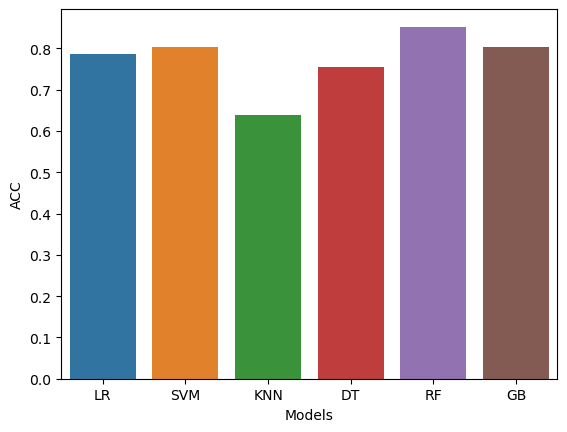

In [48]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [49]:
X=data.drop('target',axis=1)
Y=data['target']
X.shape

(302, 13)

In [50]:
rfc= RandomForestClassifier()
rfc.fit(X, Y)


RandomForestClassifier()

# Actual Prediction

In [51]:
new_data=pd.DataFrame({'age':52,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3},index=[0])
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [52]:
p=rfc.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# Save

In [53]:
import joblib 

In [54]:
joblib.dump(rfc,"Heart Disease Prediction Model") #save

['Heart Disease Prediction Model']

In [55]:
model=joblib.load('Heart Disease Prediction Model')

In [56]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [57]:
from tkinter import *
import joblib

In [58]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=int(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model=joblib.load('Heart Disease Prediction Model')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    if result==0:
        Label(master,text="No Heart Disease").grid(row=31)
    else:
        Label(master,text="Possibility of Heart Disease").grid(row=31)
master=Tk()
master.title("Heart Disease Prediction System")
label=Label(master,text="Heart Disease Prediction System",bg='black',fg='white')
label.grid(row=0, columnspan=2)
Label(master,text="Enter your age").grid(row=1)
Label(master,text="Male/Female [0/1]").grid(row=2)
Label(master,text="Enter value of CP").grid(row=3)
Label(master,text="Enter value of trestbps").grid(row=4)
Label(master,text="Enter value of chol").grid(row=5)
Label(master,text="Enter value of fbs").grid(row=6)
Label(master,text="Enter value of restecg").grid(row=7)
Label(master,text="Enter value of thalach").grid(row=8)
Label(master,text="Enter value of exang").grid(row=9)
Label(master,text="Enter value of oldpeak").grid(row=10)
Label(master,text="Enter value of slope").grid(row=11)
Label(master,text="Enter value of ca").grid(row=12)
Label(master,text="Enter value of thal").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
Button(master,text="Predict",command=show_entry_fields).grid()
mainloop()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
